In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Lemonade.csv')
df[:3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15


In [2]:
df['Day'] = df['Day'].map({'Sunday':7, 
                           'Saturday':6, 
                           'Friday':5, 
                           'Thursday': 4, 
                           'Wednesday':3, 
                           'Tuesday':2, 
                           'Monday':1})

In [3]:
# 文字 轉 數字
# label-encoder Sun:7, Sat:6. Fri:5, Thr: 4, Wed:3, Tue:2, Mon:1
# one-hot-encode

In [4]:
# 設定 X(features), y(label)
X, y = df[['Day', 'Temperature', 'Rainfall', 'Flyers', 'Price']].values, df[['Sales']].values
# 分成訓練、驗證資料(選擇性)

# 選擇演算法 餵入資料 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# 預測 = Azure Score
model.predict(X)
# 評估 = Azure evaluate
print(model.score(X, y))
# 模型參數 y = Wx + b
model.coef_, model.intercept_

0.9820890738474032


(array([[-0.01804813,  0.36966716, -2.22222706,  0.01870547,  2.4048011 ]]),
 array([3.22549903]))

In [5]:
df['predict'] = model.predict(X)
df['residual'] = (df['Sales'] - df['predict']) /df['Sales'] * 100
df[:]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,predict,residual
0,01/01/2017,7,27.0,2.00,15,0.3,10,9.637744,3.622564
1,02/01/2017,1,28.9,1.33,15,0.3,13,11.937292,8.174676
2,03/01/2017,2,34.5,1.33,27,0.3,15,14.213846,5.241029
3,04/01/2017,3,44.1,1.05,28,0.3,17,18.385531,-8.150184
4,05/01/2017,4,42.4,1.00,33,0.3,18,17.943688,0.312846
...,...,...,...,...,...,...,...,...,...
360,27/12/2017,3,42.7,1.00,33,0.3,19,18.072636,4.880863
361,28/12/2017,4,37.8,1.25,32,0.3,16,15.668957,2.069021
362,29/12/2017,5,39.5,1.25,17,0.3,15,15.998761,-6.658404
363,30/12/2017,6,30.9,1.43,22,0.3,13,12.495101,3.883836


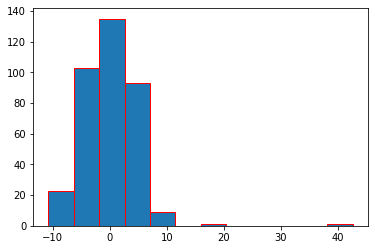

In [6]:
# 繪圖 殘差 = 真正與預測的差異 %
import matplotlib.pyplot as plt
plt.hist(df.residual, bins=12, edgecolor='red')
plt.show()